Лабораторная работа номер 5. Приближённое решение дифф уравнений

Упражнение 1. Метод ломанных Эйлера

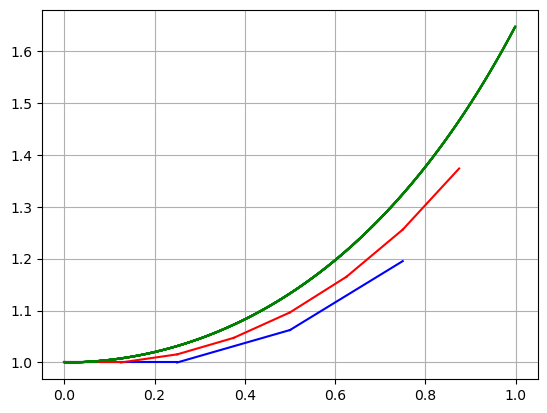

2048


In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def Eulers_method(func, x_0, y_0, a, b, n_0, epsilon):
    n_1 = 2 * n_0
    n = 0
    flag = True
    
    while True:
        x = [x_0]
        y = [y_0]
        x_ = [x_0]
        y_ = [y_0]
        
        difference = []
        delta_x1 = (b - a)/n_0
        delta_x2 = (b - a)/n_1
        maxl = 0
        
        for i in range(1, n_0):
            x.append(x[i-1] + delta_x1)
            y.append(y[i-1] + func(x[i-1], y[i-1]) * delta_x1)
        
        for i in range(1, n_1):
            x_.append(x_[i-1] + delta_x2)
            y_.append(y_[i-1] + func(x_[i-1], y_[i-1]) * delta_x2)
            
        for i in range(1, n_1):
            for j in range(1, n_0):
                if x_[i] == x[j]:
                    difference.append(abs(y_[i] - y[j]))
                    
        if max(difference) > maxl:
            maxl = max(difference)
        
        if flag:
            for i in range(n_0 - 1):
                plt.plot([x[i], x[i+1]], [y[i], y[i+1]], "b-", label='n_0')
            for i in range(n_1 - 1):
                plt.plot([x_[i], x_[i+1]], [y_[i], y_[i+1]], "r-", label = '2*n_0')
            flag = False
        
        if maxl < epsilon:
            n = n_1
            for i in range(n - 1):
                plt.plot([x_[i], x_[i+1]], [y_[i], y_[i+1]], "g-", label = 'n')
            break
        else:
            n_0 = n_1
            n_1 = 2 * n_1
    
    plt.grid()
    plt.show()
    
    print(n)
    return [x_, y_]

def f(x,y):
    return x*y

mas = Eulers_method(f, 0, 1, 0, 1, 4, 0.001)

Упражнение 2. Метод последовательных приближений

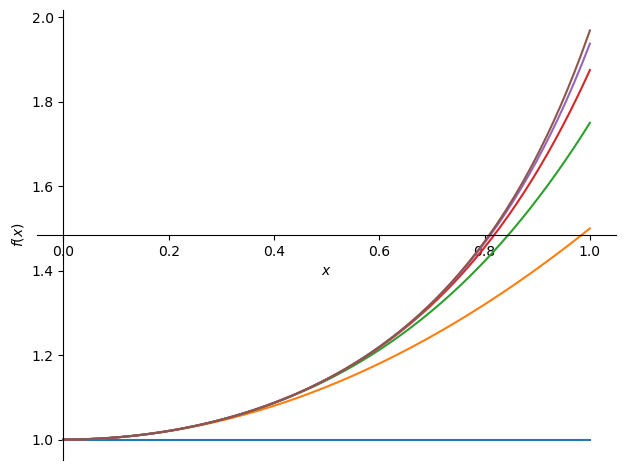

In [11]:
from sympy import *

def method_of_successive_approximations(func, x0, y0, n0):
    t = Symbol('t')
    x = Symbol('x')
    phi=[y0]
    p1=plot(phi[0],(x,0,1),show=False)
    
    for i in range(1, n0 + 1):
        phi.append(y0 + integrate(func(t,phi[i-1]),(t,x0,x))) 
        p1.extend(plot(phi[i],(x,0,1),show=False))
    p1.show()
    
def f(x,y):
    return x*y

method_of_successive_approximations(f, 0, 1, 5)